# EDA for Shopify Fall Intern Challange 
## By Spencer Hodapp 
### All work is my own

Python Q's 
A) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
First I think the mostly likely cause for an absurdly higher metric number would be wrong input. Some one puts 2,000 instead of 200. Assuming this is not the case, then outliers would be a second bet.  

B) What metric would you report for this dataset?
I like an IQR score to continue to use the AOV metric but make it robust agianst outliers. In this case I dont think we can really say those sky high order and purchase amounts are bad data, I am working from the assumption that all data is correct, so the IQR give us a more factual AOV while limiting the effect of outlier data. 

C) What is its value?
I would report an AOV of 2 items at $227, but I would also make sure to high-light that this is a reporting pair. Additionally I would run my analysis and assumptions by a coworker or manager as the case may be. 

SQL Q's
1. ANSWER: 54 
CODE:
SELECT COUNT (*)
FROM [Orders]
JOIN [Shippers]
    ON Orders.ShipperID = Shippers.ShipperID
WHERE ShipperName = 'Speedy Express’


2. ANSWER: Peacock [40] 
CODE: 
SELECT [Employees].LastName, COUNT (*) AS Number_of_Orders
FROM [Orders]
JOIN [Employees]
ON [Orders].EmployeeID = [Employees].EmployeeID
GROUP BY [Employees].LastName
Order By Number_of_Orders DESC 
LIMIT 1

3. ANSWER: Steeleye Stout [100] 
SELECT p.ProductName, cus.Country, od.Quantity
FROM Orders o
INNER JOIN OrderDetails od ON
od.OrderID= o.OrderID
INNER JOIN Products p ON
p.ProductID= od.ProductID
INNER JOIN Customers cus ON
cus.CustomerID= o.CustomerID
WHERE Country = 'Germany'
GROUP BY p.ProductName
order by Quantity DESC
LIMIT 1;


#### Python Code 

In [1]:
#This is my work that informed the above analysis
# Loading libraries and data 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
df = pd.read_excel(r'C:\Users\shodapp\Downloads\2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [2]:
#Checking head, changing data types other formatting and dropping unessecary columns 

print(df.head(5))

df = df.astype({"shop_id": int, "user_id":int, "total_items": int}, errors='raise') 
print(df.dtypes)


#Finding null values 
print(df.isnull().sum())

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0       1.0     53.0    746.0         224.0          2.0           cash   
1       2.0     92.0    925.0          90.0          1.0           cash   
2       3.0     44.0    861.0         144.0          1.0           cash   
3       4.0     18.0    935.0         156.0          1.0    credit_card   
4       5.0     18.0    883.0         156.0          1.0    credit_card   

               created_at  
0 2017-03-13 12:36:56.190  
1 2017-03-03 17:38:51.999  
2 2017-03-14 04:23:55.595  
3 2017-03-26 12:43:36.649  
4 2017-03-01 04:35:10.773  
order_id                 float64
shop_id                    int32
user_id                    int32
order_amount             float64
total_items                int32
payment_method            object
created_at        datetime64[ns]
dtype: object
order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at      

In [5]:
#Cheaking for duplicates and removing unneeded columns 


duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

#Dropping Id because there are no duplicate rows meaning order_id is just an index for the sample, not an actual qualitative measure
df =df.drop(['order_id'], axis=1)

print(df.tail(5))

number of duplicate rows:  (0, 7)
      shop_id  user_id  order_amount  total_items payment_method  \
4995       73      993         330.0            2          debit   
4996       48      789         234.0            2           cash   
4997       56      867         351.0            3           cash   
4998       60      825         354.0            2    credit_card   
4999       44      734         288.0            2          debit   

                  created_at  
4995 2017-03-30 13:47:16.597  
4996 2017-03-16 20:36:16.389  
4997 2017-03-19 05:42:42.228  
4998 2017-03-16 14:51:18.188  
4999 2017-03-18 15:48:18.205  


order_id        2499.5
shop_id           51.0
user_id          150.0
order_amount     227.0
total_items        2.0
dtype: float64


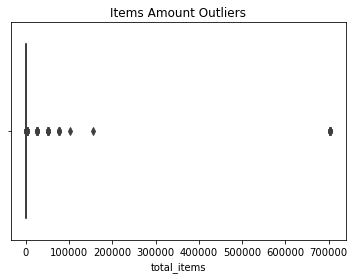

In [4]:
# detecting outliers with an IQR score and visulization to adjust as to why AOV is so high 
sns.boxplot(x=df['order_amount']).set(title='Order Amount Outliers')
sns.boxplot(x=df['total_items']).set(title='Items Amount Outliers')
#Viz shows we have a MAJOR statistical outliers in order amount and purchase amount 


#setting IQR value 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 -Q1
print(IQR)

